# 🚀 Making some Mars maps with pygmt 🌌

This tutorial page covers the basics of creating some maps and 3D plot of Mars (yes! Mars). The idea here is to demonstrate that you can use a simple sequence of commands with PyGMT, a Python wrapper for the Generic Mapping Tools (GMT), and with some public data about the topography of Mars, create your own maps, as well as compare this topography with what we know of our own planet Earth.

Version: 2024, updating the PyGMT to the last version<br>
**Note**: Please, see the original files at [GitHub](https://github.com/GenericMappingTools/egu22pygmt)


### Mars dataset

First, we open the `mola32.nc` file using xarray. Note the longitudes are from 0-360°, latitudes are distributed from North to South and the `alt`variable is the MOLA Topography at 32 pixels/degree built from original MOLA file `megt90n000fb.img`. The source is the Mars Climate Database from the European Space Agency.

In [2]:
import xarray as xr

dset_mars = xr.open_dataset('mola32.nc')
dset_mars

<xarray.Dataset> Size: 133MB
Dimensions:    (latitude: 5760, longitude: 11520)
Coordinates:
  * latitude   (latitude) float32 23kB 89.98 89.95 89.92 ... -89.95 -89.98
  * longitude  (longitude) float32 46kB 0.01562 0.04688 0.07812 ... 360.0 360.0
Data variables:
    alt        (latitude, longitude) int16 133MB ...
Attributes:
    title:    MOLA Topography - 32 pixels/degree
    history:  Built from original MOLA file megt90n000fb.img

Just like any other notebook with pygmt, we import the library and manipulate other data. To make a map of the entire Martian surface without a lot of time and memory, let's reduce the resolution using `grdsample`. We also take the opportunity to transform an `alt` variable into a `float` to be used in maps.

In [3]:
import pygmt

dset_mars_topo = dset_mars.alt.astype(float)
dset_mars_topo = pygmt.grdsample(grid=dset_mars_topo, translate=True, spacing=[0.9375,0.9375])

# Note the WARNING because the delta_x/delta_y of the MOLA dataset is 0.03125 degrees. If you want to correct this, just use a multiple of the spacing.

grdsample [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdsample [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdsample (gmtapi_init_grdheader): Please select compatible -R and -I values
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


Here we can create a map of the entire Martian surface, in the same projections we use for our planet.

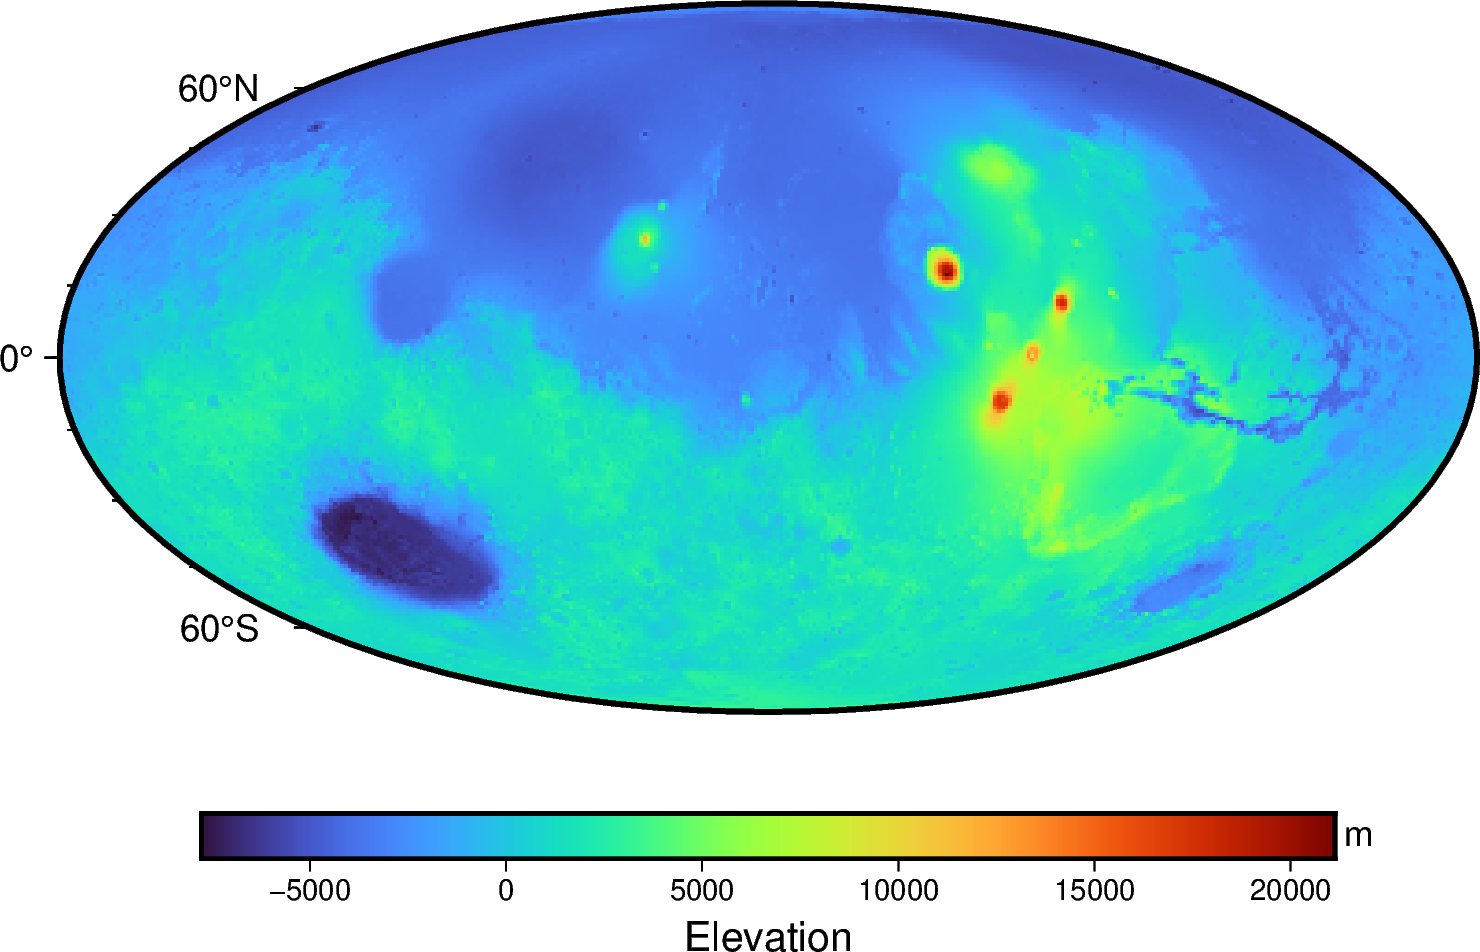

In [4]:
fig = pygmt.Figure()

fig.grdimage(grid=dset_mars_topo,region='g',frame=True,projection='W12c')
fig.colorbar(frame=['a5000','x+lElevation','y+lm'])

fig.show()

A very interesting feature is Mount Olympus (Olympus Mons - see more details at https://mars.nasa.gov/resources/22587/olympus-mons), centered at approximately 19°N and 133°W, with a height of 22 km (14 miles) and approximately 700 km (435 miles) in diameter. Let's use the original dataset at 32 pixels/degree resolution and plot a (not so interesting) map with `xarray`.

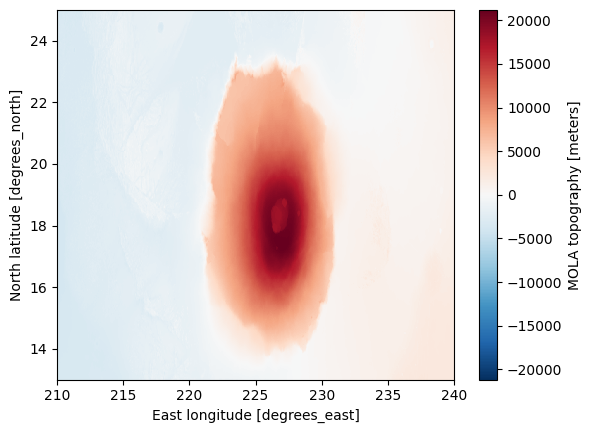

In [5]:
dset_olympus = dset_mars.sel(latitude=slice(25,13),longitude=slice(210,240)).alt.astype(float)
dset_olympus.plot()

### Using `grdview` for 3D Visualization

The `grdview` function in PyGMT is a powerful tool for creating 3D perspective views of gridded data. By adjusting azimuth and elevation parameters, you can change the viewpoint, helping you to highlight specific terrain features or data patterns. Let’s go through how these parameters affect the visualization.

**Setting the Perspective: Azimuth and Elevation**

- **Azimuth** (`azimuth`): Controls the horizontal rotation of the view, ranging from 0° to 360°. Lower values (close to 0°) represent a viewpoint from the north, while 90° gives a view from the east, 180° from the south, and so on. Experimenting with azimuth can help showcase specific aspects of the data from different angles.

- **Elevation** (`elevation`): Controls the vertical angle of the view, with 90° representing a top-down perspective and lower values providing more of a side view. Typically, values between 20° and 60° create a balanced 3D effect.

**Example**: 
Using `perspective=[150,45]` means your `azimuth=150` and `elevation=45` gives a southeast view, tilted at a moderate angle to capture both horizontal and vertical details.


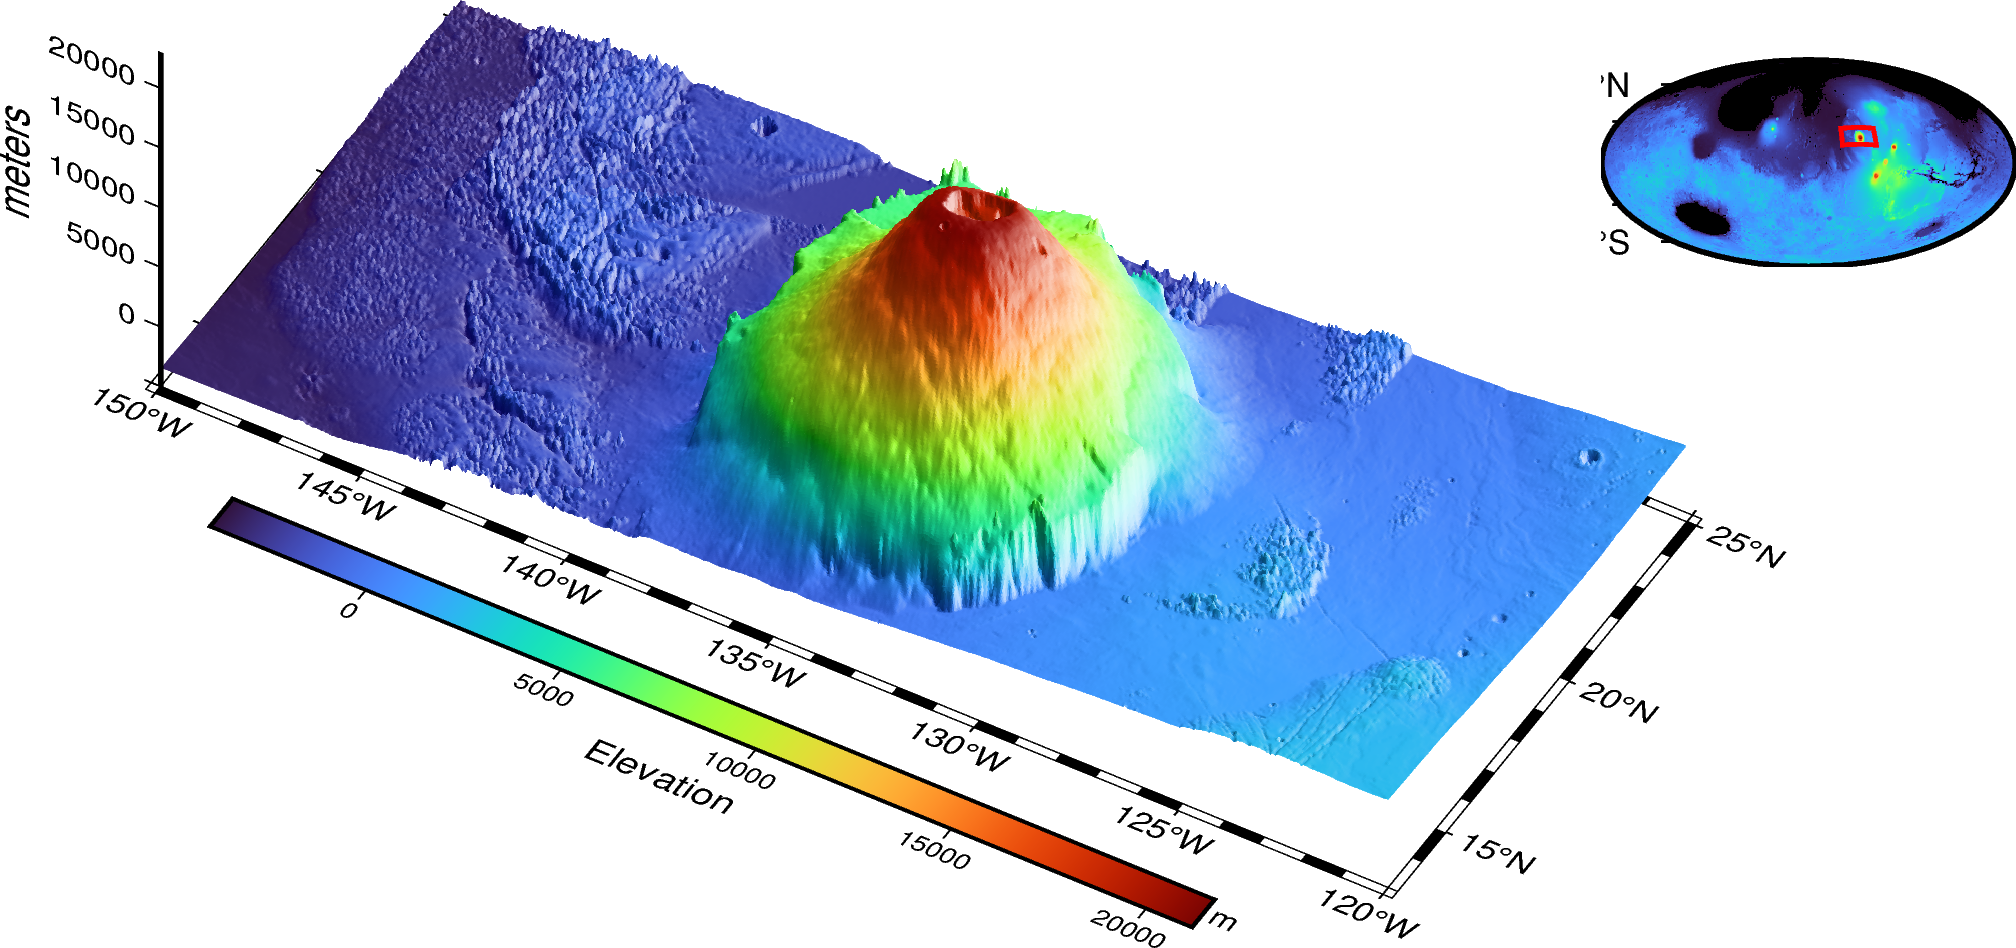

In [6]:
fig = pygmt.Figure()

fig.grdview(grid=dset_olympus,
           region=[210,240,13,25,-5000,23000],
           surftype='s',
           projection='M12c',
           perspective=[150,45],
           zsize='4c',
           frame=['xa5f1','ya5f1','z5000+lmeters','wSEnZ'],shading='+a50+nt1')

bounds = [[210,13],
         [210,25],
         [240,25],
         [240,13],
         [210,13]]

fig.colorbar(perspective=True,frame=['a5000','x+lElevation','y+lm'])
with fig.inset(position='JTR+w3.5c+o0.2c',margin=0,box=None):
    fig.grdimage(grid=dset_mars_topo,region='g',frame=True,projection='W3.5c')
    fig.plot(bounds, pen='1p,red')

fig.show()

### Choosing the Right Perspective

Choosing the right azimuth and elevation depends on the specific features you want to highlight:
- **Top-down views** (elevation around 90°) are good for general overviews.
- **Moderate angles** (elevation between 20°-60°) provide depth and make terrain features stand out.
- **Low angles** with higher azimuth values can emphasize vertical exaggeration and are ideal for dramatic terrain.

Experiment with these parameters in `grdview` to find the best view for your data!


**A few notes**

`zsize` is a bit critical here because the volcano is very big (28 km if we consider -5000 to +23000 m). Likewise, `perspective=[150,45]` was choosen attempting (it's a matter of taste) and depends of which flank of the volcano you want to show. But this choice has to be made according to `shading` since to give a good 3D impression, the lighting must be adjusted according to the elevation and azimuth of the perspective. Finally, the pen outline is made smooth and small to enhance the contours of the topography.

Finally, let's make a combined map showing the planet in an inset in the upper right corner. We use the same bounding box coordinates used to cut out the topography, drawing in red on the map. Obviously here the color scale is the same.

There are a few bonus maps in the *extended version* in github.

Have fun.<br>
If you enjoyed this notebook!